In [ ]:
# 변수의 shape, type, value 확인
def p(var,_name="") :
    if _name != "" : print(f'<<{_name}>>')
    if type(var)!=type([]):
        try:
            print(f'Shape:{var.shape}')
        except :
            pass
    print(f'Type: {type(var)}')
    print(f'Values: {var}')

def pst(_x,_name=""):
    print(f'<<{_name}>> Shape{_x.shape}, {type(_x)}')
def ps(_x,_name=""):
    print(f'<<{_name}>> Shape{_x.shape}')

In [ ]:
import tensorflow as tf
import keras
from keras import layers

import numpy as np
import matplotlib.pylab as plt
plt.rcParams['figure.figsize'] = [5, 3.5]
plt.rcParams["font.size"] = "8"

tf.__version__,keras.__version__

('2.18.0', '3.8.0')

# Model 설계 workfolw

## Fit method에서 callback사용하기

---
```python
## fit() arguments, default values
Model.fit(
    x=None,                       # 입력 데이터
    y=None,                       # 대상 데이터
    batch_size=None,              # 그라디언트 업데이트 / 샘플 수
    epochs=1,                     # 모델을 훈련시킬 에포크 수
    verbose=1,                    # 0 = 무음, 1 = 진행률 표시 줄, 2 = 에포크 당 한 줄
    callbacks=None,               # keras.callbacks.Callback인스턴스 list   
    validation_split=0.0,         # 검증 데이터로 사용될 훈련 데이터의 비율
    validation_data=None,         # 각 에포크의 끝에서 모델 메트릭을 평가할 데이터
    shuffle=True,                 # 각 에포크 전에 훈련 데이터를 임의 순서로 섞을 것인지
    class_weight=None,            # 손실 함수의 가중치를 부여하는 데 사용, 부족한 클래스에 가중치 제공
    sample_weight=None,           # 손실 기능의 가중치를 부여하는 데 사용, 샘플들 간에 다른 가중치 제공
    initial_epoch=0,              # 훈련을 시작할 시점, 훈련을 재개하는 데 유용
    steps_per_epoch=None,         # 에포크의 완료를 선언할 배치의 수, 무한 반복되는 데이터 사용시
    validation_steps=None,        # 검증의 완료를 선언할 배치의 수, 무한 반복되는 데이터 사용시
    validation_batch_size=None,   # 검증 배치 당 샘플 수, 지정되지 않은 경우 batch_size
    validation_freq=1,            # 지정한 에포크끝에서 검증 수행, ( =5, =[1, 2, 10] )
    max_queue_size=10,            # generator 또는 Sequence 입력에만 사용, 최대 generator 큐
    workers=1,                    # generator 또는 Sequence입력에만 사용, 최대  프로세스기반 쓰레드
    use_multiprocessing=False,    # generator 또는 Sequence입력에만 사용, 최대  프로세스기반 쓰레드
)
```
---

- callback 사용하기

다음과 같은 형태로 callback에 여러개의 함수를 적용할 수 있습니다.

---
```python
def scheduler(epoch, lr):
   if epoch < 10: return lr
   else         : return lr * tf.math.exp(-0.1)

my_callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_acc",patience=5),
    keras.callbacks.LearningRateScheduler(scheduler),
    kears.callbacks.ReduceLROnPlateau(monitor='val_loss',
                              factor=0.1,patience=3, min_lr=0.00001),    
    keras.callbacks.TensorBoard(log_dir='./logs'),
    keras.callbacks.ModelCheckpoint(filepath='./ckpt/cp.ckpt',
                                    save_best_only=True, save_weights_only=False,),
    keras.callbacks.BackupAndRestore(backup_dir='./backup',save_freq="epoch",
                                    delete_checkpoint=True) ]
model.fit(x_train,y_train, epochs=100, batch_size=1024, callbacks=my_callbacks,
          validation_data=(x_test, y_test))
```
---

In [ ]:
# 데이터 준비
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# 모델 정의
## Sequential model 사용
def Create_model1():
    model = keras.models.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))
    model.add(layers.Dense(64, activation="relu"))
    model.add(keras.layers.Dense(units=10, activation='softmax'))
    return model

model = Create_model1()
# compile option
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### EarlyStopping

In [ ]:
# fit option : EarlyStoping 설정
my_callbacks = [ keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=2), ]
model.fit(x_train,y_train, epochs=100, batch_size=1024, callbacks=my_callbacks,
          validation_data=(x_test, y_test))

Epoch 1/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - accuracy: 0.5317 - loss: 39.2144 - val_accuracy: 0.8510 - val_loss: 4.3222
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8530 - loss: 3.5838 - val_accuracy: 0.8576 - val_loss: 2.2691
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8483 - loss: 1.8917 - val_accuracy: 0.8427 - val_loss: 1.3877
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8489 - loss: 1.0785 - val_accuracy: 0.8464 - val_loss: 1.0209


###  LearningRateScheduler

---
```python
epoch = 100

def scheduler(epoch):
    initial_lrate = 0.01
    if epoch < 10:  # 10, 20, 30, 50, ...
        return 0.01  # lr, 0.01, 0.001, ...
    else:
        return initial_lrate * tf.math.exp(0.03 * (10 - epoch))

my_callbacks = [ keras.callbacks.LearningRateScheduler(scheduler), ]
model.fit(x_train,y_train, epochs=20, batch_size=1024, callbacks=my_callbacks,
          validation_data=(x_test, y_test))
```
---

#### ExponentialDecay

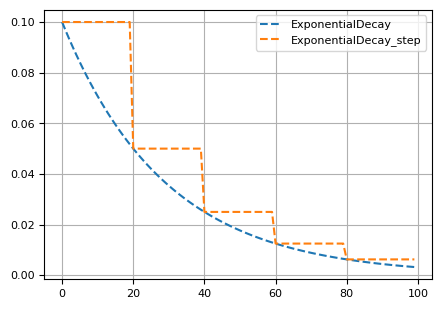

In [ ]:
def ExponentialDecay(step,staircase=False):
    initial_lrate = 0.1
    decay_steps = 20
    decay_rate=0.5
    if staircase :
        return initial_lrate * decay_rate ** (step // decay_steps)
    return initial_lrate * decay_rate ** (step / decay_steps)

lr=[]
lr_s=[]
for step in range(100):
    lr.append(ExponentialDecay(step,staircase=False))
    lr_s.append(ExponentialDecay(step,staircase=True))

plt.plot(lr, linestyle='--', label="ExponentialDecay")
plt.plot(lr_s, linestyle='--', label="ExponentialDecay_step")
plt.legend()
plt.grid()
plt.show()

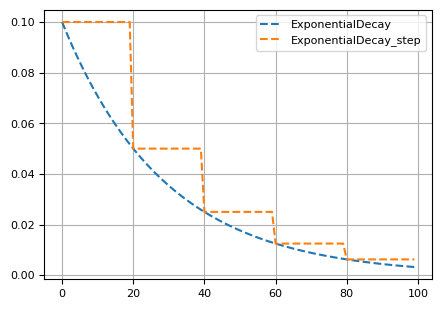

In [ ]:
# 데이터 준비
# (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# y_train = keras.utils.to_categorical(y_train, num_classes=10)
# y_test = keras.utils.to_categorical(y_test, num_classes=10)
#x_train = x_train/255.  ##
#x_test = x_test/255.    ##

In [ ]:
model = Create_model1()

initial_lrate = 0.005
epochs=50
batch_size=1024

# compile option
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=initial_lrate),
              metrics=['accuracy'])

## learning rate schdueler와 비교하기 위해서 저장
history1 = model.fit(x_train,y_train, epochs=epochs, batch_size=batch_size,
                      validation_data=(x_test, y_test), verbose=2 )

Epoch 1/50
59/59 - 1s - 24ms/step - accuracy: 0.5694 - loss: 27.4163 - val_accuracy: 0.6285 - val_loss: 1.2450
Epoch 2/50
59/59 - 1s - 20ms/step - accuracy: 0.6891 - loss: 1.1595 - val_accuracy: 0.6225 - val_loss: 1.8360
Epoch 3/50
59/59 - 1s - 21ms/step - accuracy: 0.7949 - loss: 0.8997 - val_accuracy: 0.8248 - val_loss: 0.6538
Epoch 4/50
59/59 - 2s - 27ms/step - accuracy: 0.8590 - loss: 0.5890 - val_accuracy: 0.8573 - val_loss: 0.5229
Epoch 5/50
59/59 - 1s - 21ms/step - accuracy: 0.8919 - loss: 0.4346 - val_accuracy: 0.9004 - val_loss: 0.4635
Epoch 6/50
59/59 - 1s - 16ms/step - accuracy: 0.9083 - loss: 0.3655 - val_accuracy: 0.9016 - val_loss: 0.4129
Epoch 7/50
59/59 - 1s - 21ms/step - accuracy: 0.9155 - loss: 0.3503 - val_accuracy: 0.8818 - val_loss: 0.5115
Epoch 8/50
59/59 - 1s - 21ms/step - accuracy: 0.9209 - loss: 0.3197 - val_accuracy: 0.9072 - val_loss: 0.4386
Epoch 9/50
59/59 - 1s - 21ms/step - accuracy: 0.9240 - loss: 0.3181 - val_accuracy: 0.9207 - val_loss: 0.4266
Epoch 10/

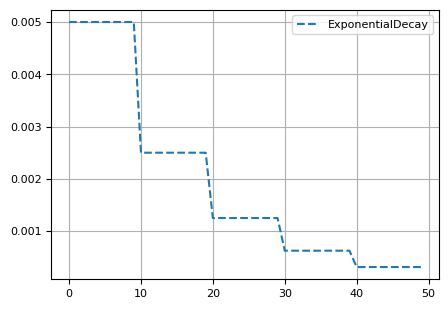

In [ ]:
epochs = 50
initial_lrate = 0.005
decay_steps = 10.
decay_rate=0.5
def ExponentialDecay_s(step):
    return initial_lrate * decay_rate ** (step // decay_steps)

lr=[]
for step in range(epochs):
    lr.append(ExponentialDecay_s(step))

plt.plot(lr, linestyle='--', label="ExponentialDecay")

plt.legend()
plt.grid()
plt.show()

In [ ]:
model = Create_model1()

# compile option
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

my_callbacks = [ keras.callbacks.LearningRateScheduler(ExponentialDecay_s)]
history2 = model.fit(x_train,y_train, epochs=epochs, batch_size=1024, callbacks=my_callbacks,
                      validation_data=(x_test, y_test))

Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5160 - loss: 90.2230 - val_accuracy: 0.6753 - val_loss: 1.2760 - learning_rate: 0.0050
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7089 - loss: 1.2698 - val_accuracy: 0.7838 - val_loss: 0.9706 - learning_rate: 0.0050
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8073 - loss: 0.8111 - val_accuracy: 0.8402 - val_loss: 0.6929 - learning_rate: 0.0050
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8628 - loss: 0.6120 - val_accuracy: 0.8903 - val_loss: 0.5132 - learning_rate: 0.0050
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8954 - loss: 0.4621 - val_accuracy: 0.8900 - val_loss: 0.5081 - learning_rate: 0.0050
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9085 - loss: 0.4076 - val_accuracy: 0.8637 - val_loss: 0.7451 - learning_rate: 0.0050
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9117 - loss: 0.5148 - val_ac

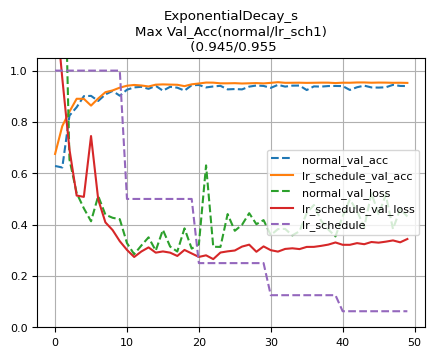

In [ ]:
h1 = history1.history
h2 = history2.history
max1 = max(h1['val_accuracy'])
max2 = max(h2['val_accuracy'])
plt.title(f"ExponentialDecay_s\nMax Val_Acc(normal/lr_sch1)\n ({max1:.3f}/{max2:.3f}")
plt.plot(h1['val_accuracy'], linestyle='--', label="normal_val_acc")
plt.plot(h2['val_accuracy'], linestyle='-', label="lr_schedule_val_acc")
plt.plot(h1['val_loss'], linestyle='--', label="normal_val_loss")
plt.plot(h2['val_loss'], linestyle='-', label="lr_schedule_val_loss")
plt.plot(np.array(h2['learning_rate'])*200,linestyle='--', label="lr_schedule")
plt.ylim(0, 1.05)
plt.legend()
plt.grid()
plt.show()

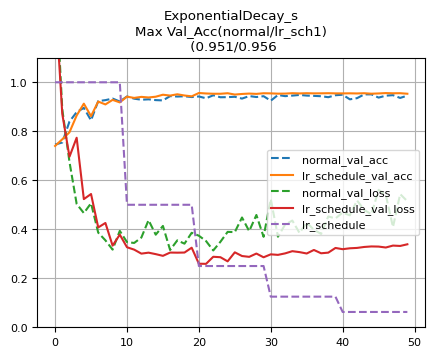

---
```python
# 내장된 Scheduler함수들
keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps, decay_rate, staircase=False, name=None
)
keras.optimizers.schedules.PolynomialDecay(
    initial_learning_rate, decay_steps, end_learning_rate=0.0001, power=1.0,
    cycle=False, name=None
)
keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate, decay_steps, decay_rate, staircase=False, name=None
)
```
---

### 내장함수로 lr scheduling 하기    
https://keras.io/2.15/api/optimizers/learning_rate_schedules/

#### 1) ExponentialDecay

In [ ]:
model = Create_model1()

lr_fn = keras.optimizers.schedules.ExponentialDecay(
                initial_learning_rate= 0.005,
                decay_steps=60*10, ## steps
                decay_rate=0.5,
                staircase=True)
# compile option
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=lr_fn),
              metrics=['accuracy'])

history3 = model.fit(x_train,y_train, epochs=50, batch_size=1024,
                      validation_data=(x_test, y_test))

Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5686 - loss: 59.5254 - val_accuracy: 0.7006 - val_loss: 1.0751
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7114 - loss: 1.1138 - val_accuracy: 0.8502 - val_loss: 0.7384
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8396 - loss: 0.6849 - val_accuracy: 0.8481 - val_loss: 0.6071
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8835 - loss: 0.4737 - val_accuracy: 0.9142 - val_loss: 0.4161
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9032 - loss: 0.4133 - val_accuracy: 0.9061 - val_loss: 0.3672
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9162 - loss: 0.3531 - val_accuracy: 0.9157 - val_loss: 0.5296
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9238 - loss: 0.3279 - val_accuracy: 0.9164 - val_loss: 0.3574
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9251 - loss: 0.3144 - val_accuracy: 0.9205 - 

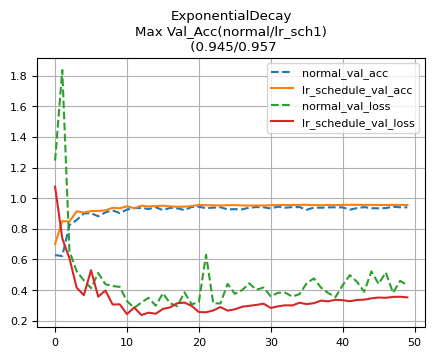

In [ ]:
h1 = history1.history
h2 = history3.history
max1 = max(h1['val_accuracy'])
max2 = max(h2['val_accuracy'])
plt.title(f"ExponentialDecay\nMax Val_Acc(normal/lr_sch1)\n ({max1:.3f}/{max2:.3f}")
plt.plot(h1['val_accuracy'], linestyle='--', label="normal_val_acc")
plt.plot(h2['val_accuracy'], linestyle='-', label="lr_schedule_val_acc")
plt.plot(h1['val_loss'], linestyle='--', label="normal_val_loss")
plt.plot(h2['val_loss'], linestyle='-', label="lr_schedule_val_loss")
#plt.ylim(0, 1.1)
plt.legend()
plt.grid()
plt.show()

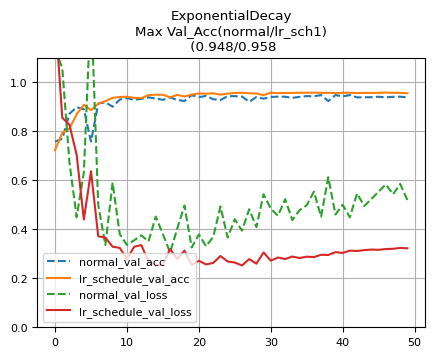

#### 2) PiecewiseConstantDecay

**step 위치와 lr 직접 지정**  
boundaries = [20x60, 35x60] # steps: epochs x iter/epoch  
values = [0.005, 0.0005, 0.0001]

In [ ]:
model = Create_model1()

boundaries = [20*60, 35*60] # steps
values = [0.005, 0.0005, 0.0001]
learning_rate_fn = keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries, values)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=learning_rate_fn),
              metrics=['accuracy'])

history4 = model.fit(x_train,y_train, epochs=50, batch_size=1024,
                      validation_data=(x_test, y_test))

Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.5167 - loss: 81.1535 - val_accuracy: 0.6512 - val_loss: 1.2841
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7081 - loss: 1.1424 - val_accuracy: 0.7881 - val_loss: 1.0424
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7922 - loss: 0.8859 - val_accuracy: 0.8549 - val_loss: 0.6153
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8567 - loss: 0.6064 - val_accuracy: 0.8259 - val_loss: 0.8623
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8783 - loss: 0.5338 - val_accuracy: 0.8800 - val_loss: 0.4682
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8983 - loss: 0.4074 - val_accuracy: 0.9106 - val_loss: 0.3797
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9125 - loss: 0.3535 - val_accuracy: 0.9276 - val_loss: 0.3355
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9203 - loss: 0.3229 - val_accuracy: 0.8350 - 

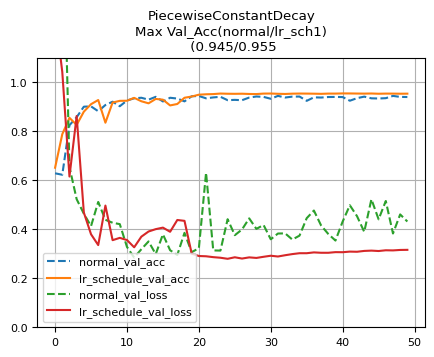

In [ ]:
h1 = history1.history
h2 = history4.history
max1 = max(h1['val_accuracy'])
max2 = max(h2['val_accuracy'])
plt.title(f"PiecewiseConstantDecay\nMax Val_Acc(normal/lr_sch1)\n ({max1:.3f}/{max2:.3f}")
plt.plot(h1['val_accuracy'], linestyle='--', label="normal_val_acc")
plt.plot(h2['val_accuracy'], linestyle='-', label="lr_schedule_val_acc")
plt.plot(h1['val_loss'], linestyle='--', label="normal_val_loss")
plt.plot(h2['val_loss'], linestyle='-', label="lr_schedule_val_loss")
plt.ylim(0, 1.1)
plt.legend()
plt.grid()
plt.show()

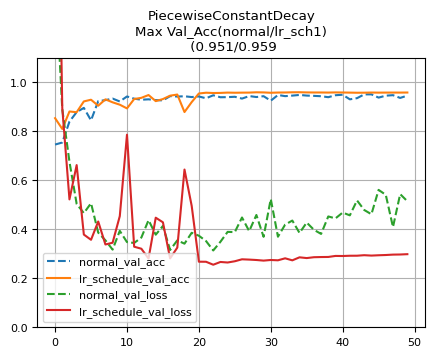

#### 3) CosineDecay : with optional warmup
  


```python
optimizers.schedules.CosineDecay(
    initial_learning_rate, # warmup 시작 lr
    decay_steps,           # 전 구간
    alpha=0.0,             # 최종 lr
    warmup_target=None    ,# warmup 종료 lr
    warmup_steps=0,        # warmup 구간  
)
```

In [ ]:
initial_learning_rate = 0.0
decay_steps = 60*50
alpha=0.0
warmup_target = 0.001
warmup_steps = 60*2

CosineDecay_lr = keras.optimizers.schedules.CosineDecay(
    initial_learning_rate, decay_steps, warmup_target=warmup_target,
    warmup_steps=warmup_steps )

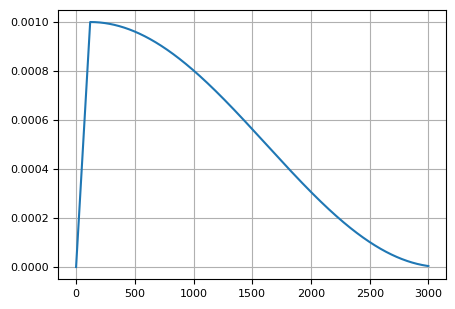

In [ ]:
decay_lr = []
for i in range(decay_steps):
  decay_lr.append(CosineDecay_lr(i))

plt.plot(decay_lr)
plt.grid()
plt.show()

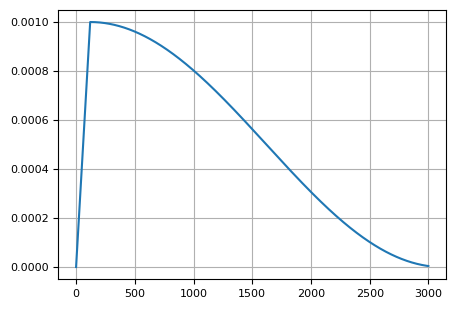

In [ ]:
model = Create_model1()

CosineDecay_lr = keras.optimizers.schedules.CosineDecay(
    initial_learning_rate, decay_steps, warmup_target=warmup_target,
    warmup_steps=warmup_steps )

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=CosineDecay_lr),
              metrics=['accuracy'])

history5 = model.fit(x_train,y_train, epochs=50, batch_size=1024,
                      validation_data=(x_test, y_test))

Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.1936 - loss: 113.1002 - val_accuracy: 0.6847 - val_loss: 12.1071
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7466 - loss: 8.8488 - val_accuracy: 0.8500 - val_loss: 3.0337
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8448 - loss: 2.4005 - val_accuracy: 0.8391 - val_loss: 1.1014
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8488 - loss: 0.8429 - val_accuracy: 0.8877 - val_loss: 0.6145
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8952 - loss: 0.4991 - val_accuracy: 0.8997 - val_loss: 0.5968
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9159 - loss: 0.3756 - val_accuracy: 0.9166 - val_loss: 0.4775
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9329 - loss: 0.2899 - val_accuracy: 0.9247 - val_loss: 0.4312
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9389 - loss: 0.2481 - val_accuracy: 0.9295 

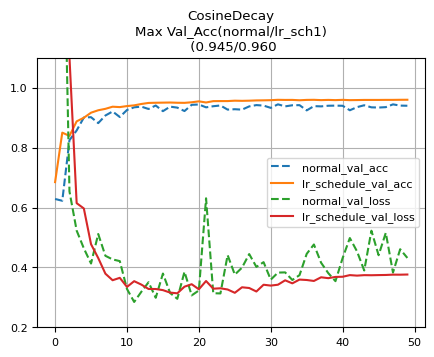

In [ ]:
h1 = history1.history
h2 = history5.history
max1 = max(h1['val_accuracy'])
max2 = max(h2['val_accuracy'])
plt.title(f"CosineDecay\nMax Val_Acc(normal/lr_sch1)\n ({max1:.3f}/{max2:.3f}")
plt.plot(h1['val_accuracy'], linestyle='--', label="normal_val_acc")
plt.plot(h2['val_accuracy'], linestyle='-', label="lr_schedule_val_acc")
plt.plot(h1['val_loss'], linestyle='--', label="normal_val_loss")
plt.plot(h2['val_loss'], linestyle='-', label="lr_schedule_val_loss")
plt.ylim(0.2, 1.1)
plt.legend()
plt.grid()
plt.show()


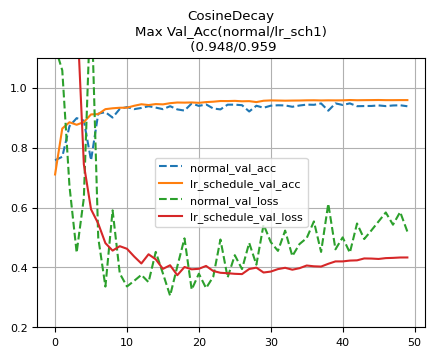

#### 4) CosineDecayRestarts

```python
keras.optimizers.schedules.CosineDecayRestarts(
    initial_learning_rate, first_decay_steps, t_mul=2.0, m_mul=1.0, alpha=0.0, name=None
)
```

In [ ]:
decay_steps = 60*50

initial_learning_rate = 0.005
first_decay_steps = 60*10
t_mul=1.0
m_mul=0.5

CosineDecayR_lr = keras.optimizers.schedules.CosineDecayRestarts(
    initial_learning_rate, first_decay_steps, t_mul=t_mul, m_mul=m_mul )

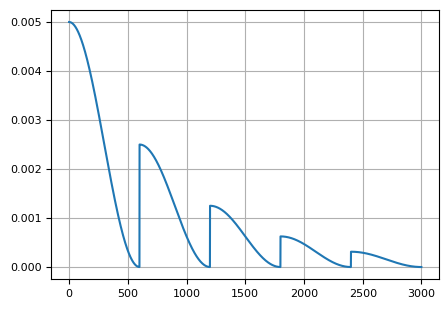

In [ ]:
decay_lr = []
for i in range(decay_steps):
  decay_lr.append(CosineDecayR_lr(i))

plt.plot(decay_lr)
plt.grid()
plt.show()

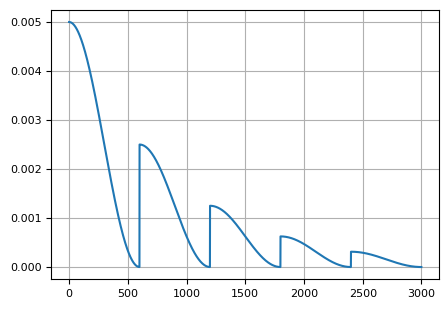

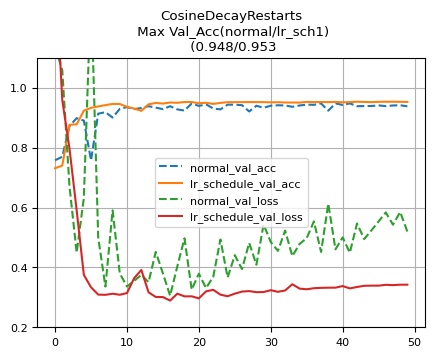

#### 5) ReduceLROnPlateau  
- 학습 정체시 learning rate 감소  

```python
callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1, # new_lr = lr * factor.
    patience=10,
    verbose=0,
    mode="auto",
    min_delta=0.0001,
    cooldown=0,
    min_lr=0,
    **kwargs
)
```

In [ ]:
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                      verbose=1,factor=0.3, patience=7, min_lr=1e-6)

history7 = model.fit(x_train,y_train, epochs=50, batch_size=1024,
                     callbacks=[reduce_lr],validation_data=(x_test, y_test))

Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9958 - loss: 0.0139 - val_accuracy: 0.9595 - val_loss: 0.3767 - learning_rate: 3.3741e-06
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9953 - loss: 0.0167 - val_accuracy: 0.9595 - val_loss: 0.3767 - learning_rate: 7.4112e-07
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9955 - loss: 0.0154 - val_accuracy: 0.9595 - val_loss: 0.3767 - learning_rate: 0.0000e+00
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9955 - loss: 0.0151 - val_accuracy: 0.9595 - val_loss: 0.3767 - learning_rate: 0.0000e+00
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9955 - loss: 0.0150 - val_accuracy: 0.9595 - val_loss: 0.3767 - learning_rate: 0.0000e+00
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9955 - loss: 0.0144 - val_accuracy: 0.9595 - val_loss: 0.3767 - learning_rate: 0.0000e+00
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9957 

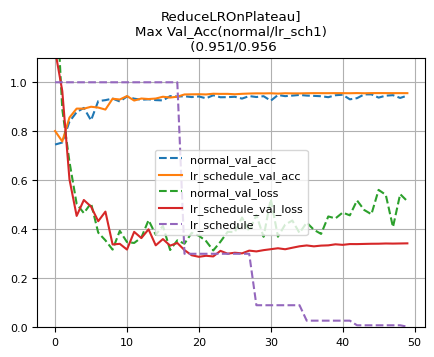

### ModelCheckPoint 저장하기

 Parameters & default values


---
```python
keras.callbacks.ModelCheckpoint(
    filepath,               # 저장할 패스
    save_weights_only=True, # 모델전체 or 가중치
    monitor='val_acc',      # 기준 metric
    mode='max',             # best의 조건(auto, min, max)
    save_best_only=True)    # 개선된 경우만 저장 선택
```
---

In [ ]:
# colab(linux)
!rm -rf ./logs/*
!rm -rf ./aicamp/*
# windows
# code/logs code/aicamp 폴더 삭제해 주세요

***code/aicamp 폴더 삭제해 주세요***

In [ ]:
model = Create_model1()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

- 모델 전체 저장하기

In [ ]:
# 모델 전체 저장하기
project = './aicamp/'
checkpoint_path = project+"ckpt.keras" ## *.ckpt -> *.keras

my_callbacks = [
    keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                    save_best_only=True,
                                    save_weights_only=False ),]
model.fit(x_train,y_train, epochs=3, batch_size=1024, callbacks=my_callbacks,
          validation_data=(x_test, y_test))

Epoch 1/3
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5320 - loss: 37.5336 - val_accuracy: 0.8444 - val_loss: 4.0194
Epoch 2/3
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8459 - loss: 3.4240 - val_accuracy: 0.8533 - val_loss: 2.3032
Epoch 3/3
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8534 - loss: 1.8676 - val_accuracy: 0.8358 - val_loss: 1.4633


In [ ]:
# 모델+가중치 읽어오기
new_model = keras.models.load_model(checkpoint_path)
new_model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8247 - loss: 1.6810


[1.463291049003601, 0.8357999920845032]

- 가중치만 저장하기

In [ ]:
# 가중치만 저장하기
checkpoint_path = project+"ckpt.weights.h5" # *.ckpt -> *.weights.h5

my_callbacks = [
    keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                    save_weights_only=True ),
              ]
model.fit(x_train,y_train, epochs=3, batch_size=1024, callbacks=my_callbacks,
          validation_data=(x_test, y_test))

Epoch 1/3
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8365 - loss: 1.1848 - val_accuracy: 0.8432 - val_loss: 1.0734
Epoch 2/3
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8519 - loss: 0.8496 - val_accuracy: 0.8627 - val_loss: 0.9051
Epoch 3/3
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8697 - loss: 0.6784 - val_accuracy: 0.8692 - val_loss: 0.8043


In [ ]:
# 새로운 모델 생성
model = Create_model1()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.evaluate(x_test,y_test,verbose=1)
print("====")
# 훈련되지 않는 모델에 가중치를 load
model.load_weights(checkpoint_path)
model.evaluate(x_test,y_test,verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0859 - loss: 161.5243
====
 18/313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8791 - loss: 0.7053 

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8538 - loss: 0.9280


[0.8043479919433594, 0.8691999912261963]

- ckpt file 이름 지정하기

In [ ]:
# ckpt file 이름 지정해서 저장하기
checkpoint_path = project+"cp.{epoch:02d}-{val_accuracy:.4f}.weights.h5"

my_callbacks = [
    keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                    save_weights_only=True ), ]

model.fit(x_train,y_train, epochs=3, batch_size=1024, callbacks=my_callbacks,
          validation_data=(x_test, y_test))

Epoch 1/3
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8734 - loss: 0.6243 - val_accuracy: 0.8813 - val_loss: 0.5785
Epoch 2/3
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9005 - loss: 0.4071 - val_accuracy: 0.9091 - val_loss: 0.4888
Epoch 3/3
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9211 - loss: 0.3120 - val_accuracy: 0.9146 - val_loss: 0.4383


In [ ]:
ls {project}

ckpt.keras       cp.01-0.8813.weights.h5  cp.03-0.9146.weights.h5
ckpt.weights.h5  cp.02-0.9091.weights.h5


### BackupAndRestore : 비정상 종료시에 이어서 학습 가능   
- 학습상태 저장 및 복원

In [ ]:
model = Create_model1()

# compile option
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [32]:
## 강제로 interrupt 발생
class InterruptingCallback(keras.callbacks.Callback):
 def on_epoch_begin(self, epoch, logs=None):
  if epoch == 4: raise RuntimeError('Interrupting!')

## Backup_Restorre 설정
Backup_Restore = keras.callbacks.BackupAndRestore(backup_dir="./backup")
my_callbacks = [Backup_Restore, InterruptingCallback()]

## 학습중에 interrupt로 중지
model.fit(x_train,y_train, epochs=10, batch_size=1024, callbacks=my_callbacks,
          validation_data=(x_test, y_test))

RuntimeError: Interrupting!

In [ ]:
## 중지된 epoch부터 다시 학습 진행
my_callbacks = [Backup_Restore,]
model.fit(x_train,y_train, epochs=10, batch_size=1024, callbacks=my_callbacks,
          validation_data=(x_test, y_test))